In [2]:
import pygame

def play( ):
    file_path = "/home/karthik/Desktop/sound.mp3"
    duration = 5
    pygame.mixer.init()
    pygame.mixer.music.load(file_path)
    pygame.mixer.music.play()

play()



pygame 2.5.2 (SDL 2.28.2, Python 3.9.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [5]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Path to the folder containing images
good_tyre_path = '/home/karthik/Desktop/CNN/git/websitecnn/archive/allimages/good'
bad_tyre_path = '/home/karthik/Desktop/CNN/git/websitecnn/archive/allimages/defective'

# Function to load and preprocess images
def load_and_preprocess_images(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = load_img(img_path, target_size=(img_height, img_width))
        img_array = img_to_array(img)
        images.append(img_array)
        labels.append(label)
    return np.array(images), np.array(labels)

# Load and preprocess images
img_height, img_width = 128, 128
good_tyre_images, good_tyre_labels = load_and_preprocess_images(good_tyre_path, label=0)
bad_tyre_images, bad_tyre_labels = load_and_preprocess_images(bad_tyre_path, label=1)

# Combine and shuffle the data
all_images = np.concatenate((good_tyre_images, bad_tyre_images), axis=0)
all_labels = np.concatenate((good_tyre_labels, bad_tyre_labels), axis=0)
shuffle_indices = np.random.permutation(len(all_images))
all_images = all_images[shuffle_indices]
all_labels = all_labels[shuffle_indices]

# Split the data into training and validation sets
split_ratio = 0.8
split_index = int(len(all_images) * split_ratio)

train_data, train_labels = all_images[:split_index], all_labels[:split_index]
val_data, val_labels = all_images[split_index:], all_labels[split_index:]

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Custom CNN model inspired by VGG16
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model with binary crossentropy and a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with data augmentation
checkpoint = ModelCheckpoint('custom_model.h5', save_best_only=True)
history = model.fit(datagen.flow(train_data, train_labels, batch_size=32), epochs=20,
                    validation_data=(val_data, val_labels), callbacks=[checkpoint])

# Evaluate on folders
def evaluate_folder(folder_path, model, data_generator):
    normal_count = 0
    cracked_count = 0

    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)

        if os.path.isfile(img_path) and img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_array = load_and_preprocess_image(img_path)
            img_array = data_generator.standardize(img_array)  # Apply data augmentation during evaluation
            img_array = np.expand_dims(img_array, axis=0)

            prediction = model.predict(img_array)[0, 0]
            predicted_class = 1 if prediction > 0.5 else 0

            if predicted_class == 1:
                cracked_count += 1
            else:
                normal_count += 1

    print(f"Total Cracked Tires: {cracked_count}")
    print(f"Total Normal Tires: {normal_count}")

# Print training history
print(history.history)
play()
# Evaluate on folders
print("Evaluation on folder with normal tires:")
evaluate_folder('/path/to/folder/with/normal/tires', model, datagen)

print("\nEvaluation on folder with cracked tires:")
evaluate_folder('/path/to/folder/with/cracked/tires', model, datagen)


Epoch 1/20
47/47 [==============================] - 22s 437ms/step - loss: 0.8325 - accuracy: 0.6301 - val_loss: 1.4628 - val_accuracy: 0.5833
Epoch 2/20
47/47 [==============================] - 21s 435ms/step - loss: 0.7526 - accuracy: 0.6577 - val_loss: 1.0345 - val_accuracy: 0.6022
Epoch 3/20
47/47 [==============================] - 21s 435ms/step - loss: 0.6846 - accuracy: 0.6799 - val_loss: 0.5807 - val_accuracy: 0.7016
Epoch 4/20
47/47 [==============================] - 21s 443ms/step - loss: 0.6609 - accuracy: 0.6894 - val_loss: 0.6176 - val_accuracy: 0.7339
Epoch 5/20
47/47 [==============================] - 21s 452ms/step - loss: 0.5919 - accuracy: 0.7365 - val_loss: 0.4728 - val_accuracy: 0.7715
Epoch 6/20
47/47 [==============================] - 21s 437ms/step - loss: 0.6092 - accuracy: 0.7251 - val_loss: 0.4664 - val_accuracy: 0.7984
Epoch 7/20
47/47 [==============================] - 21s 436ms/step - loss: 0.6324 - accuracy: 0.7224 - val_loss: 0.4603 - val_accuracy: 0.8172

FileNotFoundError: [Errno 2] No such file or directory: '/path/to/folder/with/normal/tires'

In [13]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler

# Path to the folder containing images
good_tyre_path = '/home/karthik/Desktop/CNN/git/websitecnn/archive/allimages/good'
bad_tyre_path = '/home/karthik/Desktop/CNN/git/websitecnn/archive/allimages/defective'

# Function to load and preprocess images
def load_and_preprocess_images(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = load_img(img_path, target_size=(img_height, img_width))
        img_array = img_to_array(img)
        images.append(img_array)
        labels.append(label)
    return np.array(images), np.array(labels)

# Load and preprocess images
img_height, img_width = 128, 128
good_tyre_images, good_tyre_labels = load_and_preprocess_images(good_tyre_path, label=0)
bad_tyre_images, bad_tyre_labels = load_and_preprocess_images(bad_tyre_path, label=1)

# Combine and shuffle the data
all_images = np.concatenate((good_tyre_images, bad_tyre_images), axis=0)
all_labels = np.concatenate((good_tyre_labels, bad_tyre_labels), axis=0)
shuffle_indices = np.random.permutation(len(all_images))
all_images = all_images[shuffle_indices]
all_labels = all_labels[shuffle_indices]

# Split the data into training and validation sets
split_ratio = 0.8
split_index = int(len(all_images) * split_ratio)

train_data, train_labels = all_images[:split_index], all_labels[:split_index]
val_data, val_labels = all_images[split_index:], all_labels[split_index:]

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Custom CNN model inspired by VGG16
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))


# Compile the model with binary crossentropy and a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Define learning rate schedule
def lr_schedule(epoch):
    if epoch < 10:
        return 0.0001
    elif epoch < 20:
        return 0.00001
    else:
        return 0.000001

# Train the model with data augmentation
checkpoint = ModelCheckpoint('custom_model2.h5', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(lr_schedule)

history = model.fit(datagen.flow(train_data, train_labels, batch_size=32),
                    epochs=30,
                    validation_data=(val_data, val_labels),
                    callbacks=[checkpoint, early_stopping, lr_scheduler])

# Print training history
print(history.history)


Epoch 1/30
47/47 [==============================] - 22s 445ms/step - loss: 1.4122 - accuracy: 0.6078 - val_loss: 1.3304 - val_accuracy: 0.6317 - lr: 1.0000e-04
Epoch 2/30
47/47 [==============================] - 20s 431ms/step - loss: 1.2030 - accuracy: 0.6759 - val_loss: 1.5517 - val_accuracy: 0.5968 - lr: 1.0000e-04
Epoch 3/30
47/47 [==============================] - 21s 437ms/step - loss: 1.1991 - accuracy: 0.6867 - val_loss: 1.1097 - val_accuracy: 0.6801 - lr: 1.0000e-04
Epoch 4/30
47/47 [==============================] - 21s 439ms/step - loss: 1.1307 - accuracy: 0.6914 - val_loss: 1.1071 - val_accuracy: 0.6989 - lr: 1.0000e-04
Epoch 5/30
47/47 [==============================] - 21s 445ms/step - loss: 1.1576 - accuracy: 0.7055 - val_loss: 1.0187 - val_accuracy: 0.7634 - lr: 1.0000e-04
Epoch 6/30
47/47 [==============================] - 21s 440ms/step - loss: 1.1076 - accuracy: 0.7244 - val_loss: 0.9965 - val_accuracy: 0.7500 - lr: 1.0000e-04
Epoch 7/30
47/47 [======================

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler

# Path to the folder containing images
good_tyre_path = '/home/karthik/Desktop/CNN/git/websitecnn/archive/allimages/good'
bad_tyre_path = '/home/karthik/Desktop/CNN/git/websitecnn/archive/allimages/defective'

# Function to load and preprocess images
def load_and_preprocess_images(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = load_img(img_path, target_size=(img_height, img_width))
        img_array = img_to_array(img)
        images.append(img_array)
        labels.append(label)
    return np.array(images), np.array(labels)

# Load and preprocess images
img_height, img_width = 128, 128
good_tyre_images, good_tyre_labels = load_and_preprocess_images(good_tyre_path, label=0)
bad_tyre_images, bad_tyre_labels = load_and_preprocess_images(bad_tyre_path, label=1)

# Combine and shuffle the data
all_images = np.concatenate((good_tyre_images, bad_tyre_images), axis=0)
all_labels = np.concatenate((good_tyre_labels, bad_tyre_labels), axis=0)
shuffle_indices = np.random.permutation(len(all_images))
all_images = all_images[shuffle_indices]
all_labels = all_labels[shuffle_indices]

# Split the data into training and validation sets
split_ratio = 0.8
split_index = int(len(all_images) * split_ratio)

train_data, train_labels = all_images[:split_index], all_labels[:split_index]
val_data, val_labels = all_images[split_index:], all_labels[split_index:]

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    
    horizontal_flip=True,
    fill_mode='nearest'
)

# Custom CNN model
model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model with binary crossentropy and a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Define learning rate schedule
def lr_schedule(epoch):
    if epoch < 10:
        return 0.0001
    elif epoch < 20:
        return 0.00001
    else:
        return 0.000001

# Train the model with data augmentation
checkpoint = ModelCheckpoint('custom_model3.h5', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(lr_schedule)

history = model.fit(datagen.flow(train_data, train_labels, batch_size=32),
                    epochs=30,
                    validation_data=(val_data, val_labels),
                    callbacks=[checkpoint, early_stopping, lr_scheduler])

# Print training history
print(history.history)


Epoch 1/30
47/47 [==============================] - 54s 1s/step - loss: 1.9399 - accuracy: 0.6287 - val_loss: 3.0115 - val_accuracy: 0.5645 - lr: 1.0000e-04
Epoch 2/30
47/47 [==============================] - 53s 1s/step - loss: 1.6818 - accuracy: 0.6840 - val_loss: 2.1185 - val_accuracy: 0.6183 - lr: 1.0000e-04
Epoch 3/30
47/47 [==============================] - 54s 1s/step - loss: 1.5995 - accuracy: 0.7150 - val_loss: 1.5193 - val_accuracy: 0.6909 - lr: 1.0000e-04
Epoch 4/30
47/47 [==============================] - 54s 1s/step - loss: 1.5970 - accuracy: 0.7392 - val_loss: 1.6083 - val_accuracy: 0.6640 - lr: 1.0000e-04
Epoch 5/30
47/47 [==============================] - 53s 1s/step - loss: 1.5461 - accuracy: 0.7345 - val_loss: 1.5051 - val_accuracy: 0.7527 - lr: 1.0000e-04
Epoch 6/30
47/47 [==============================] - 53s 1s/step - loss: 1.5767 - accuracy: 0.7224 - val_loss: 1.6137 - val_accuracy: 0.6478 - lr: 1.0000e-04
Epoch 7/30
47/47 [==============================] - 53s 1s

1/1 [==============================] - 0s 58ms/step


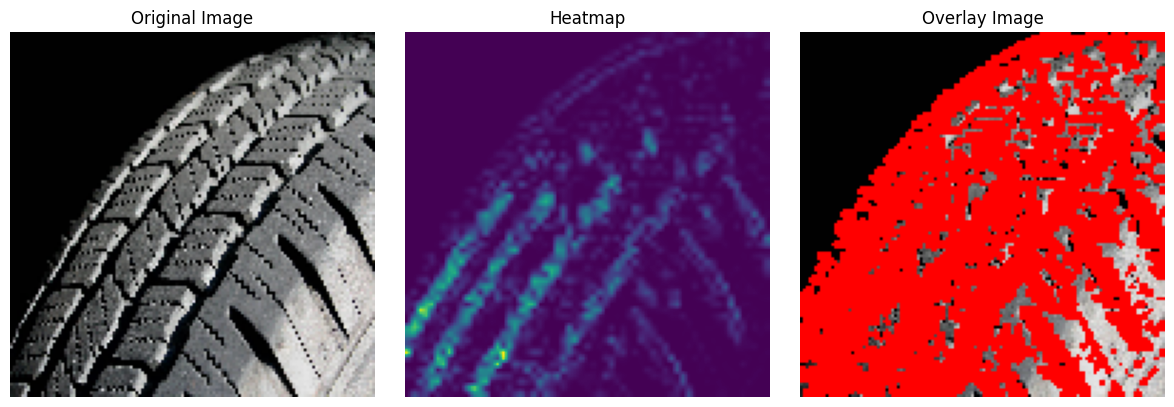

In [21]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from keras import models

model = models.load_model('dude.h5')

image_path = '/home/karthik/Downloads/prr.jpeg'
img = load_img(image_path, target_size=(128, 128))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  


visualization_models = [models.Model(inputs=model.input, outputs=layer.output) for layer in model.layers]


target_layer = 4  

if target_layer < len(visualization_models):

    feature_maps = visualization_models[target_layer].predict(img_array)


    if len(feature_maps.shape) == 4:
        heatmap = feature_maps[0, :, :, 0] 
    else:
        raise ValueError(f"Unexpected feature_maps shape: {feature_maps.shape}")


        heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap) + 1e-8)


    heatmap_resized = cv2.resize(heatmap, (img_array.shape[2], img_array.shape[1]))


    threshold = 0.6
    dark_areas = heatmap_resized < threshold


    overlay_img = np.uint8(img_array[0].copy())


    overlay_img[~dark_areas, :] = [255, 0, 0]  # Red color


    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(heatmap_resized, cmap='viridis')
    plt.title('Heatmap')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(overlay_img)
    plt.title('Overlay Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print(f"Invalid target_layer index. Choose a value between 0 and {len(visualization_models) - 1}.")


In [2]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Path to the saved model
model_path = 'dude.h5'  # Change this to the path where your saved model is located

# Function to load and preprocess a single image
def load_and_preprocess_image(img_path, target_size=(128, 128)):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Load the saved model
model = load_model(model_path)

# Path to the image you want to predict
image_path = '/home/karthik/Downloads/prr.jpeg'
# Load and preprocess the image
img_array = load_and_preprocess_image(image_path)

# Make prediction
prediction = model.predict(img_array)[0, 0]  # Extracting the scalar value from the prediction tensor

# Display the prediction result
print(f"Prediction: {prediction}")






2024-03-03 23:15:26.597818: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-03 23:15:26.775214: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-03 23:15:26.775352: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-03 23:15:26.801289: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-03 23:15:26.867493: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-03 23:15:26.868437: I tensorflow/core/platform/cpu_feature_guard.cc:1

1/1 [==============================] - 0s 168ms/step
Prediction: 3.057038355791519e-08


In [3]:
image_path = '/home/karthik/Desktop/sathivk-git/total/totalproject/flaskuploads/Untitled-57.jpg_1709418077636'
img = load_img(image_path, target_size=(128, 128))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  


visualization_models = [models.Model(inputs=model.input, outputs=layer.output) for layer in model.layers]


target_layer = 4  

if target_layer < len(visualization_models):

    feature_maps = visualization_models[target_layer].predict(img_array)


    if len(feature_maps.shape) == 4:
        heatmap = feature_maps[0, :, :, 0] 
    else:
        raise ValueError(f"Unexpected feature_maps shape: {feature_maps.shape}")


        heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap) + 1e-8)


    heatmap_resized = cv2.resize(heatmap, (img_array.shape[2], img_array.shape[1]))


    threshold = 0.6
    dark_areas = heatmap_resized < threshold


    overlay_img = np.uint8(img_array[0].copy())


    overlay_img[~dark_areas, :] = [255, 0, 0]  # Red color


    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(heatmap_resized, cmap='viridis')
    plt.title('Heatmap')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(overlay_img)
    plt.title('Overlay Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print(f"Invalid target_layer index. Choose a value between 0 and {len(visualization_models) - 1}.")



model_path = 'dude.h5'  # Change this to the path where your saved model is located

# Function to load and preprocess a single image
def load_and_preprocess_image(img_path, target_size=(128, 128)):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Load the saved model
model = load_model(model_path)

# Path to the image you want to predict
# Load and preprocess the image
img_array = load_and_preprocess_image(image_path)

# Make prediction
prediction = model.predict(img_array)[0, 0]  # Extracting the scalar value from the prediction tensor

# Display the prediction result
print(f"Prediction: {prediction}")
if prediction >0.5:
    print("cracked") 
    
else:
    print("normal")






NameError: name 'models' is not defined

1/1 [==============================] - 0s 108ms/step


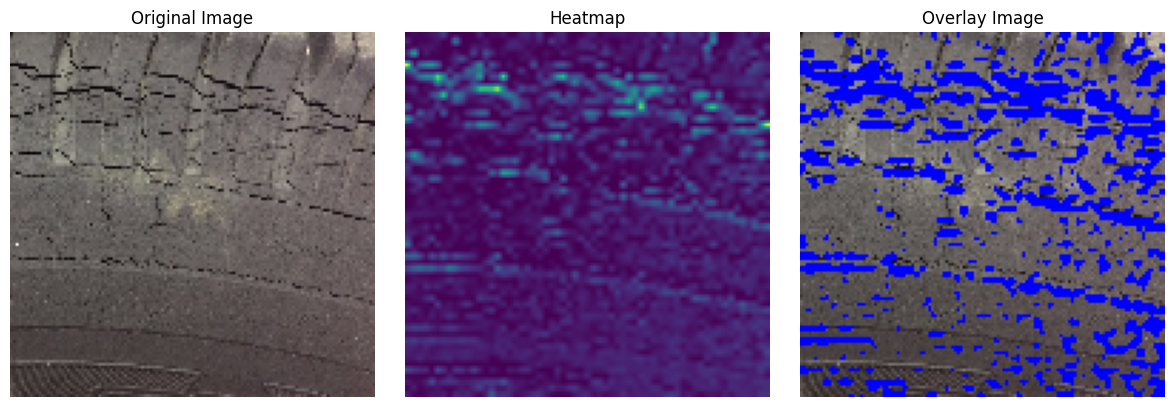

In [30]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from keras import models

model = models.load_model('dude.h5')

image_path = '/home/karthik/Desktop/CNN/catdog/dataset/test_set/cracked/Cracked-1.jpg'
img = load_img(image_path, target_size=(128, 128))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  


visualization_models = [models.Model(inputs=model.input, outputs=layer.output) for layer in model.layers]


target_layer = 4  

if target_layer < len(visualization_models):

    feature_maps = visualization_models[target_layer].predict(img_array)


    if len(feature_maps.shape) == 4:
        heatmap = feature_maps[0, :, :, 0] 
    else:
        raise ValueError(f"Unexpected feature_maps shape: {feature_maps.shape}")


        heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap) + 1e-8)


    heatmap_resized = cv2.resize(heatmap, (img_array.shape[2], img_array.shape[1]))


    threshold = 0.6
    dark_areas = heatmap_resized < threshold


    overlay_img = np.uint8(img_array[0].copy())


    overlay_img[~dark_areas, :] = [0, 0, 255]  # Red color


    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(heatmap_resized, cmap='viridis')
    plt.title('Heatmap')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(overlay_img)
    plt.title('Overlay Image')
    plt.axis('off')

    plt.tight_layout()
    
    # Save the overlay image
    cv2.imwrite('/home/karthik/Desktop/sathivk-git/total/totalproject/heatmap_images/overlay_image.png', overlay_img)

    plt.show()
else:
    print(f"Invalid target_layer index. Choose a value between 0 and {len(visualization_models) - 1}.")
